In [1]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#importing libraries

df=pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Domain Analysis

We are predicting the selling price of different cars based on several factors:

Features:

-Purchased Year

-Present Price (Crucial feature)

-Driven Kilometers

-Fuel Type

-Selling Type

-Transmission

-Owner

Total Features: 9 (including categorical and numerical features).

-Output Feature: Selling Price

Key Insight: Present Price plays a significant role in price prediction.

Time-Based Feature: The dataset includes Year, which can be used to derive car age (Current Year - Purchased Year).

The Task which is we gonna do is regression task

# Basic Check

all the values with in the dataset are non-null

encoding task- Car_Name , Fuel_Type	,Selling_type,  Transmission

scaling task-Selling_Price,	Present_Price,Driven_kms

outliers handling - selling_price , present_price

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.describe(include='O')

,Car_Name,Fuel_Type,Selling_type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


# EDA - Exploratory Data Analysis

Insights from Histogram:

1]Year of Vehicles:

Most vehicles were manufactured between 2010 and 2018.

2]Ownership:

More than 90% of vehicles had 0 previous owners (i.e., they were never resold).

3]Fuel Type Distribution:

Petrol vehicles dominate the dataset.

4]Diesel & CNG are fewer, with only 2 CNG vehicles recorded.

5]Seller Type Distribution:

Dealers hold 196 vehicles, while individuals hold 106.

6]Transmission Type:

More than 70% of vehicles have manual transmission

7]no corrupted values(like 0) in selling and present price.

In [6]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

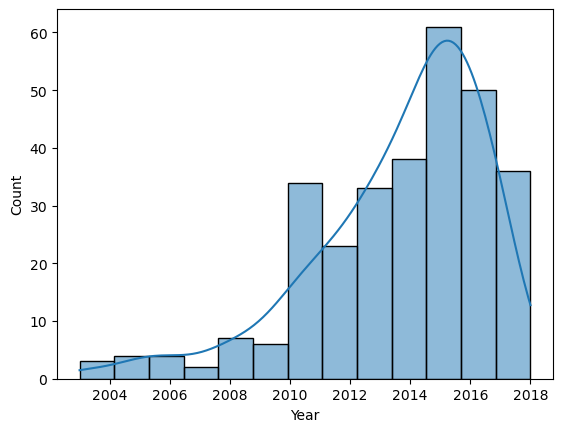

In [7]:
sns.histplot(x=df['Year'] , kde=True)
plt.show()

<Axes: xlabel='Owner', ylabel='Count'>

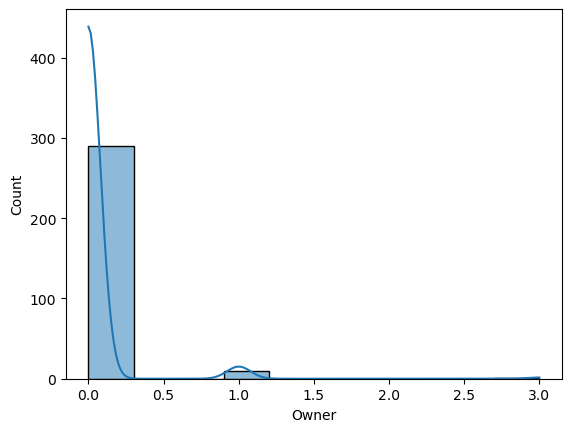

In [8]:
sns.histplot(x=df['Owner'] , kde=True)

<Axes: xlabel='Fuel_Type', ylabel='Count'>

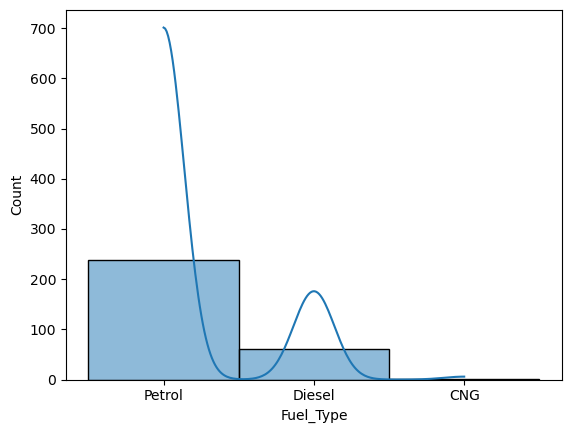

In [9]:
sns.histplot(x=df['Fuel_Type'] , kde=True)

<Axes: xlabel='Selling_type', ylabel='Count'>

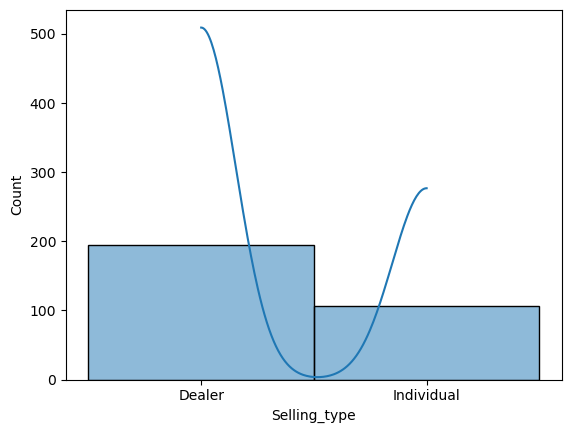

In [10]:
sns.histplot(x=df['Selling_type'] , kde=True)

<Axes: xlabel='Transmission', ylabel='Count'>

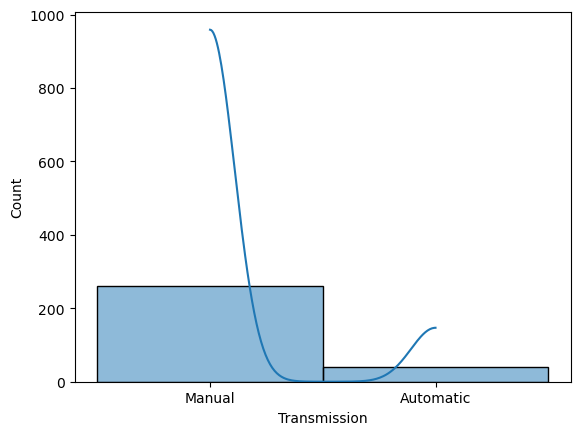

In [11]:
sns.histplot(x=df['Transmission'] , kde=True)

<Axes: xlabel='Present_Price', ylabel='Count'>

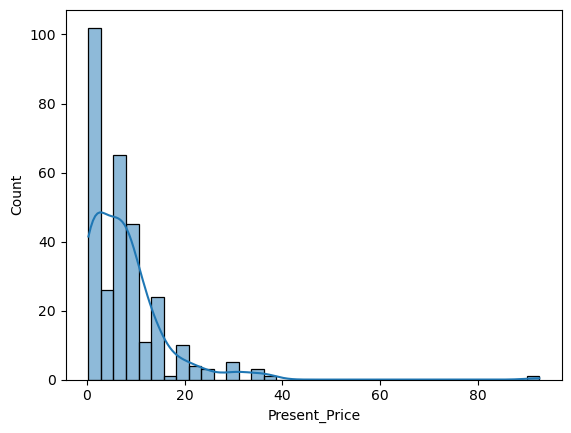

In [28]:
sns.histplot(x=df['Present_Price'] , kde=True)

<Axes: xlabel='Selling_Price', ylabel='Count'>

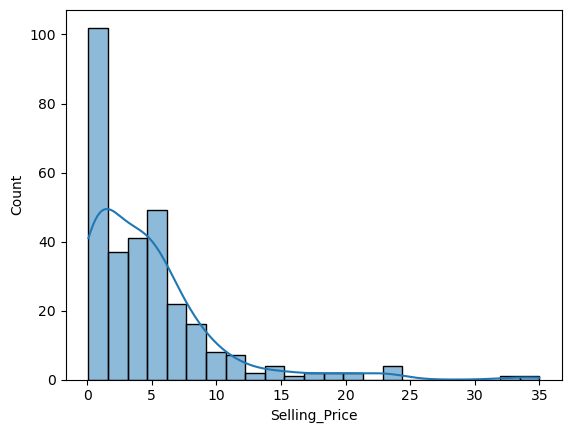

In [30]:
sns.histplot(x=df['Selling_Price'] , kde=True)

# Bi-Variate

Bi-Variate Analysis

1]Year vs. Selling Price
`
Most vehicles were manufactured between 2010-2018,  accrording to data still they are highely driven so.

There is weak connection and correlation between Year and Selling_Price.(0.23) 

2]Driven_kms vs. Selling Price

Despite good variance in Driven_kms, its correlation with Selling_Price is very weak (0.029).

Most cars have been driven between 0 to 100,000 km, meaning mileage alone does not strongly impact price.

3]Present Price vs. Selling Price

Strong positive correlation (0.87), indicating that higher new car prices generally lead to higher resale value.

4]Owners vs. Selling Price

Weak correlation (-0.088), meaning the number of previous owners does not significantly impact the selling price.

5]Transmission and Fuel_type vs Selling Price

Selling Price is not differeing because of this columns still gonna keep it since they are categorical columns.

so , hence we can exclude two features (driven_kms , owner )while training .

we will include year feature because we have various models so we cant decide vehicles price by purchased year.

<Axes: xlabel='Selling_Price', ylabel='Year'>

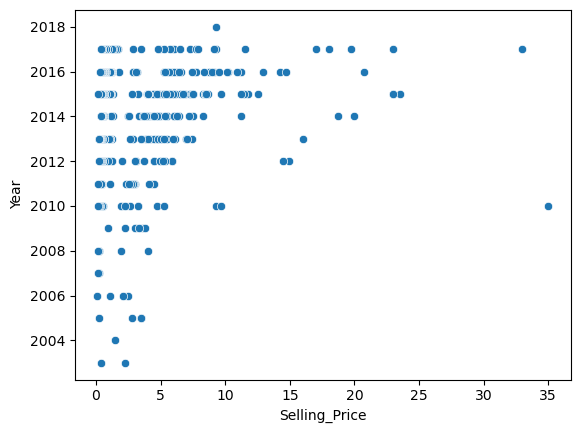

In [12]:
# there is no relation b/w purchased year and selling_price

sns.scatterplot(y=df['Year'] , x=df['Selling_Price'])

<Axes: xlabel='Driven_kms', ylabel='Selling_Price'>

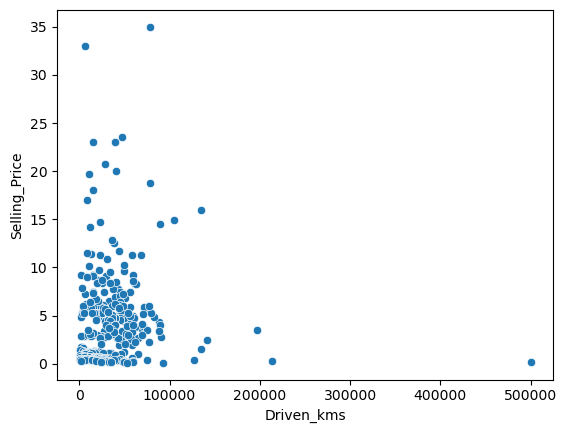

In [13]:
sns.scatterplot(x=df['Driven_kms'] , y=df['Selling_Price'])

<Axes: xlabel='Selling_Price', ylabel='Present_Price'>

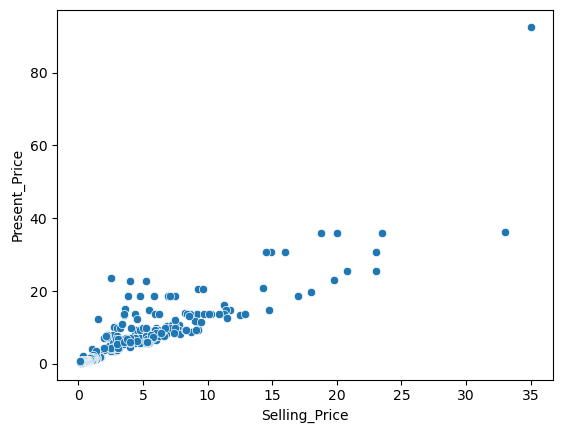

In [14]:
sns.scatterplot(x=df['Selling_Price'] , y=df['Present_Price'])

<Axes: xlabel='Selling_Price', ylabel='Owner'>

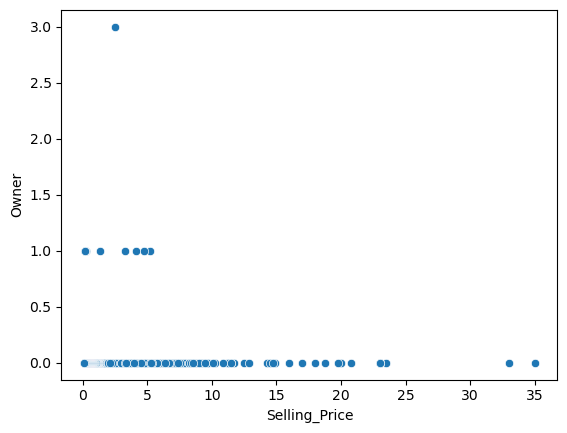

In [15]:
sns.scatterplot(x=df['Selling_Price'] , y=df['Owner'])

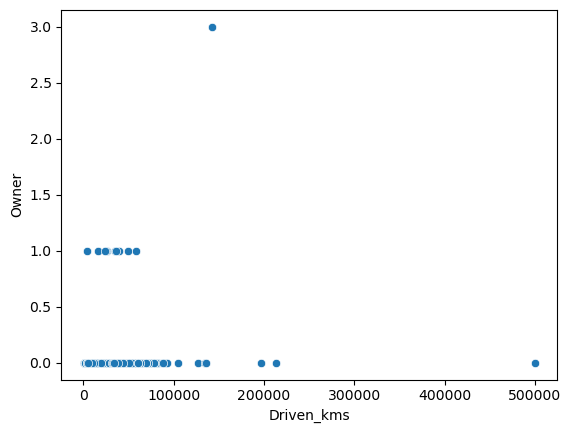

In [16]:
sns.scatterplot(x=df['Driven_kms'] , y=df['Owner'])
plt.show()

<Axes: xlabel='Selling_Price', ylabel='Transmission'>

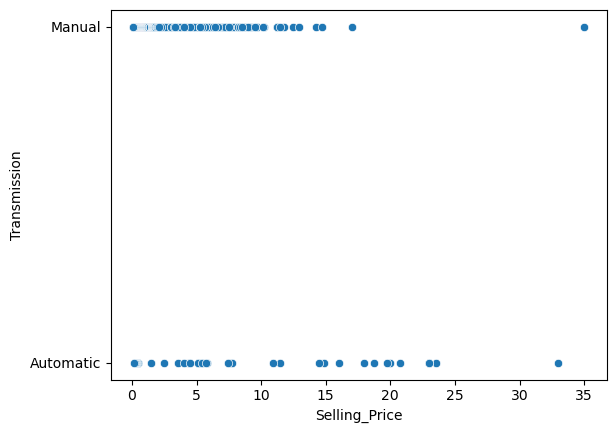

In [23]:
sns.scatterplot(y=df['Transmission'] , x=df['Selling_Price'])

<Axes: xlabel='Selling_Price', ylabel='Fuel_Type'>

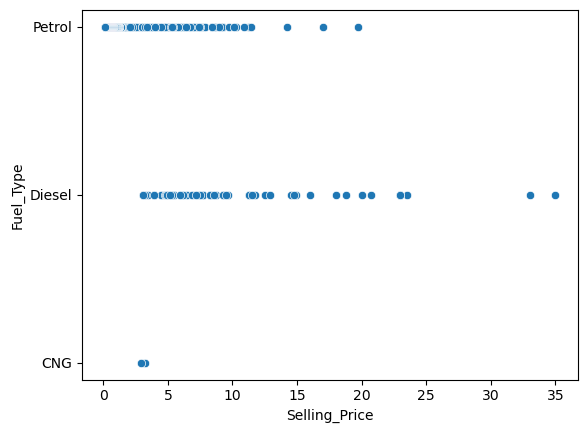

In [25]:
sns.scatterplot(x=df['Selling_Price'] , y=df['Fuel_Type'])

In [17]:
df.corr(numeric_only=True) 

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


# Feature Enginering

## Data Preprocessing 

1]no null or missing and corrupted values

2]about features:

categorical or discrete:

car_name - label encoder
fuel_type - one hot encoder
transmission - label encoder
selling_type - label encoder

continuos features:

selling price and present price - no corrupted datapoints , outliers are present and then scale it with standard scaler

Car_Age vs. Selling_Price → -0.236 (negative correlation).
Year vs. Selling_Price → 0.236 (positive correlation).

Since both give the same magnitude of correlation but opposite signs, you can use either one. However, Car_Age might be more intuitive for models to understand (newer cars have lower age, older cars have higher age).

In [19]:
#no-null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [36]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

## Outliers Handling

<Axes: xlabel='Selling_Price'>

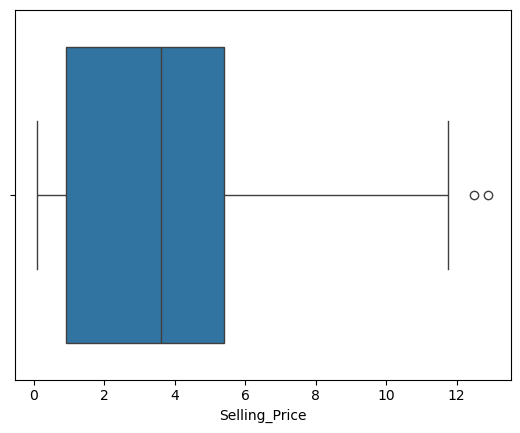

In [47]:
# median=3.6

sns.boxplot(x=df['Selling_Price'])

In [39]:
df['Selling_Price'].median()

3.6

In [43]:
#Selling_price

q1=0.900000
q3=6.000000

iqr=q3-q1

l=q1-iqr*1.5
u=q3+iqr*1.5

print(l , u)

-6.749999999999999 13.649999999999999


In [46]:
#handled all the outliers

df.loc[df['Selling_Price'] >  13.649999999999999  , 'Selling_Price'] = 3.6

Series([], Name: Selling_Price, dtype: float64)

<Axes: xlabel='Present_Price'>

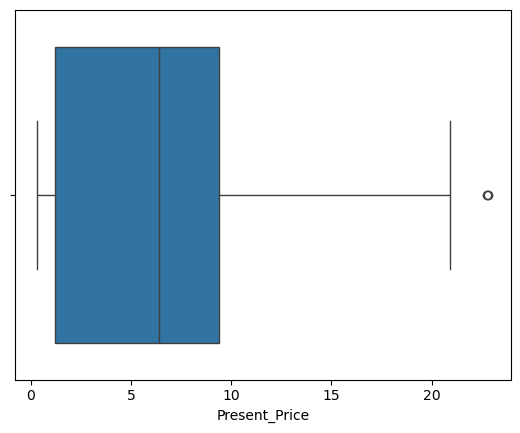

In [55]:
#median= = 6.4

sns.boxplot(x=df['Present_Price'])

In [51]:
df['Present_Price'].median()

6.4

In [49]:
#Present Price 

q1=1.200000
q3=9.900000

iqr=q3-q1

l=q1-iqr*1.5
u=q3+iqr*1.5

print(l,u,iqr)

-11.850000000000001 22.950000000000003 8.700000000000001


In [54]:
#handled all the outliers

df.loc[df['Present_Price']>22.950000000000003  , 'Present_Price'] = 6.4

# Scaling Continuos feature

In [56]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss

StandardScaler()

In [60]:
#scaled the values

df[['Present_Price' , 'Selling_Price']] = ss.fit_transform(df[['Present_Price' , 'Selling_Price']])
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,-0.119939,-0.141857,27000,Petrol,Dealer,Manual,0
1,sx4,2013,0.353394,0.639850,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,1.198631,0.701199,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,-0.288987,-0.426834,5200,Petrol,Dealer,Manual,0
4,swift,2014,0.302679,0.111455,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,1.959345,1.047524,33988,Diesel,Dealer,Manual,0
297,brio,2015,0.099822,-0.080508,60000,Petrol,Dealer,Manual,0
298,city,2009,-0.119939,0.928784,87934,Petrol,Dealer,Manual,0
299,city,2017,2.635535,1.225635,9000,Diesel,Dealer,Manual,0


# Encoding

## Label Encoder

In [61]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le

LabelEncoder()

In [63]:
# encoded cat's values into binary values

df['Car_Name']     = le.fit_transform(df['Car_Name'])
df['Transmission'] = le.fit_transform(df['Transmission'])

In [79]:
df['Selling_type'] = le.fit_transform(df['Selling_type'])

## One-hot encoder

In [ ]:
self_employed = pd.get_dummies(df.Self_Employed,dtype=int,prefix="Self_employed") # here we are apply OneHot Encoding on Self_employed features and store in Self_employed variables.
df = pd.concat([self_employed,df],axis=1) # here we are merging our Self_employed dummy column with df. Now we don't need self_employed columns we will drop it later

In [67]:
#creating dummies

dummy_fuel = pd.get_dummies(df['Fuel_Type'] , dtype=int)
dummy_fuel

,CNG,Diesel,Petrol
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
296,0,1,0
297,0,0,1
298,0,0,1
299,0,1,0


In [73]:
# merging dummies into main dataframe

df = pd.concat([df , dummy_fuel] , axis=1)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,CNG,Diesel,Petrol
0,90,2014,-0.119939,-0.141857,27000,Petrol,Dealer,1,0,0,0,1
1,93,2013,0.353394,0.639850,43000,Diesel,Dealer,1,0,0,1,0
2,68,2017,1.198631,0.701199,6900,Petrol,Dealer,1,0,0,0,1
3,96,2011,-0.288987,-0.426834,5200,Petrol,Dealer,1,0,0,0,1
4,92,2014,0.302679,0.111455,42450,Diesel,Dealer,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
296,69,2016,1.959345,1.047524,33988,Diesel,Dealer,1,0,0,1,0
297,66,2015,0.099822,-0.080508,60000,Petrol,Dealer,1,0,0,0,1
298,69,2009,-0.119939,0.928784,87934,Petrol,Dealer,1,0,0,0,1
299,69,2017,2.635535,1.225635,9000,Diesel,Dealer,1,0,0,1,0


In [75]:
# dropping out old feature

df.drop('Fuel_Type' , axis=1 , inplace=True)
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Selling_type,Transmission,Owner,CNG,Diesel,Petrol
0,90,2014,-0.119939,-0.141857,27000,Dealer,1,0,0,0,1
1,93,2013,0.353394,0.639850,43000,Dealer,1,0,0,1,0
2,68,2017,1.198631,0.701199,6900,Dealer,1,0,0,0,1
3,96,2011,-0.288987,-0.426834,5200,Dealer,1,0,0,0,1
4,92,2014,0.302679,0.111455,42450,Dealer,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
296,69,2016,1.959345,1.047524,33988,Dealer,1,0,0,1,0
297,66,2015,0.099822,-0.080508,60000,Dealer,1,0,0,0,1
298,69,2009,-0.119939,0.928784,87934,Dealer,1,0,0,0,1
299,69,2017,2.635535,1.225635,9000,Dealer,1,0,0,1,0


In [82]:
# converting year values as a age of cars.

def car_age(x):
    return 2025-x

In [83]:
df['Year']=car_age(df['Year'])

In [86]:
#re-named it 

df.rename({'Year' : 'Car_Age'} , axis=1 , inplace=True)
df

,Car_Name,Car_Age,Selling_Price,Present_Price,Driven_kms,Selling_type,Transmission,Owner,CNG,Diesel,Petrol
0,90,11,-0.119939,-0.141857,27000,0,1,0,0,0,1
1,93,12,0.353394,0.639850,43000,0,1,0,0,1,0
2,68,8,1.198631,0.701199,6900,0,1,0,0,0,1
3,96,14,-0.288987,-0.426834,5200,0,1,0,0,0,1
4,92,11,0.302679,0.111455,42450,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
296,69,9,1.959345,1.047524,33988,0,1,0,0,1,0
297,66,10,0.099822,-0.080508,60000,0,1,0,0,0,1
298,69,16,-0.119939,0.928784,87934,0,1,0,0,0,1
299,69,8,2.635535,1.225635,9000,0,1,0,0,1,0


# Feature Selection

1]year & driven_kms- excluded for training then will include if model's performance is not good.

2]Car_Age vs. Selling_Price → -0.236 (negative correlation).
Year vs. Selling_Price → 0.236 (positive correlation).

In [77]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Selling_type', 'Transmission', 'Owner', 'CNG', 'Diesel', 'Petrol'],
      dtype='object')

<Axes: >

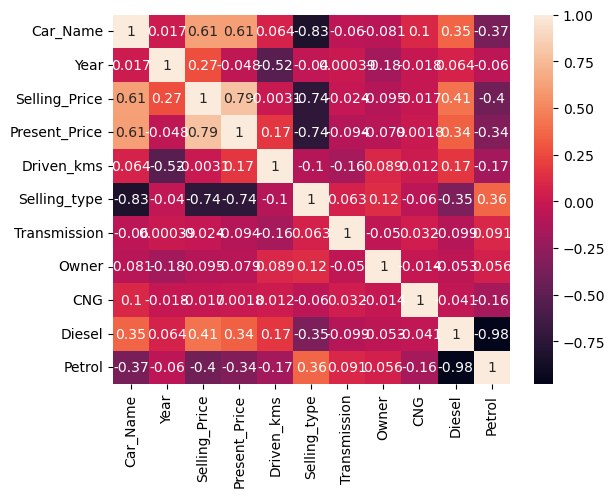

In [81]:
sns.heatmap(df.corr(numeric_only=True) ,annot=True)